In [1]:
import os
import sys

import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt

PROJ_ROOT =  os.path.join(os.pardir)

print(os.path.abspath(PROJ_ROOT))

d:\DANIELA\Projects\WIDS\covid-outcomes-research


In [2]:
#Let your audience know when this notebook was run, and with which packages. Useful when you are not sharing the notebook as
#executable code.

%pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext watermark

In [4]:
%watermark -a "Daniela Alvarez Zegarra" -d -t -v -p numpy,pandas

Author: Daniela Alvarez Zegarra

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.3.0

numpy : 1.21.5
pandas: 1.4.2



In [5]:
#Documentation to know what other info can i get with watermark

%watermark?

Docstring:
::

  %watermark [-a AUTHOR] [-gu GITHUB_USERNAME] [-e EMAIL] [-ws WEBSITE]
                 [-d] [-n] [-t] [-i] [-z] [-u] [-c CUSTOM_TIME] [-v]
                 [-p PACKAGES] [-co] [-h] [-m] [-g] [-r] [-b] [-w] [-iv]

IPython magic function to print date/time stamps
and various system information.

optional arguments:
  -a AUTHOR, --author AUTHOR
                        prints author name
  -gu GITHUB_USERNAME, --github_username GITHUB_USERNAME
                        prints author github username
  -e EMAIL, --email EMAIL
                        prints author email
  -ws WEBSITE, --website WEBSITE
                        prints author or project website
  -d, --date            prints current date as YYYY-mm-dd
  -n, --datename        prints date with abbrv. day and month names
  -t, --time            prints current time as HH-MM-SS
  -i, --iso8601         prints the combined date and time including the time
                        zone in the ISO 8601 standard with UTC off

In [6]:
#Let's print our requirements

print(open(os.path.join(PROJ_ROOT,'requirements.txt')).read())

# local package
-e .

# external requirements
click
Sphinx
coverage
awscli
flake8
python-dotenv>=0.5.1
jupyter
ipython
numpy
pandas
matplotlib
scikit-learn
scipy
pytest
nbdime
runipy
seaborn



## Loading the Data

In [2]:
merged_data_path = os.path.join(PROJ_ROOT,
                          "data",
                          "interim",
                          "merged_dataframe.csv")

In [3]:
df = pd.read_csv(merged_data_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 111 entries, Unnamed: 0.1 to STAB
dtypes: float64(72), int64(36), object(3)
memory usage: 2.7+ MB


# Milestone I: Exploratory data analysis

**Looking for correlations**

In [6]:
num_cols = df.select_dtypes(['int', 'float']).columns

**Looking for outliers**

In [7]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1569.500000,1569.500000,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,906.584249,906.584249,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,0.000000,0.000000,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,784.750000,784.750000,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,1569.500000,1569.500000,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,2354.250000,2354.250000,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,3139.000000,3139.000000,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [8]:
#creating a function to visualize outliers

def outliers(feature): 
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    sns.boxplot(df[feature])

    plt.subplot(1,2,2)
    sns.histplot(df[feature], bins = 5)

    plt.show()

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


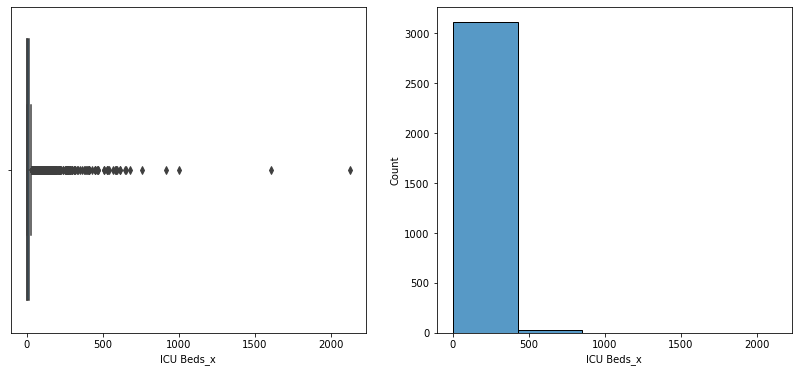

In [9]:
#Look for outliers  in ICU Beds feature
outliers('ICU Beds_x')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


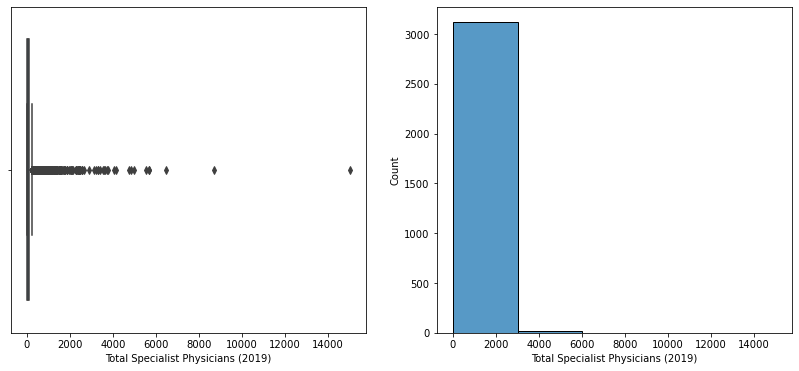

In [10]:
outliers('Total Specialist Physicians (2019)')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


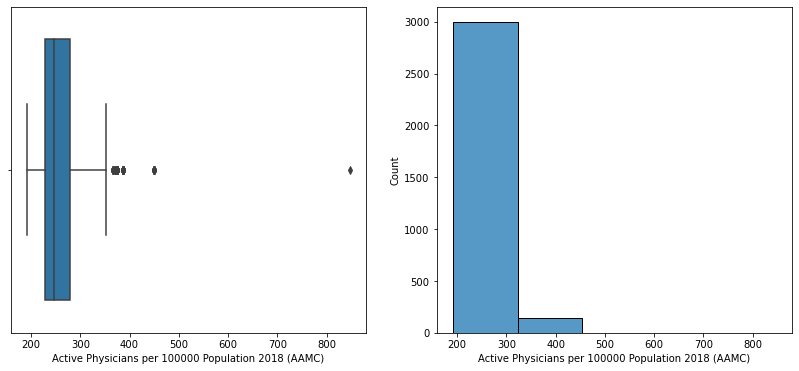

In [11]:
outliers('Active Physicians per 100000 Population 2018 (AAMC)')

**Density plots**


In [12]:
#for eda

def kde_plot(dataframe, variable, upper=None, lower=None, bw=0.1):
    '''Plots a density plot for a variable with optional upper and lower bounds on the data (inclusive)'''
    
    plot_data = dataframe [variable]
    
    if upper is not None:
        plot_data = plot_data[plot_data <= upper]
    if lower is not None:
        plot_data = plot_data[plot_data >= lower]
        
    sns.kdeplot(plot_data, bw=bw)
    
    plt.savefig(os.path.join(PROJ_ROOT, "reports", "figures","{}.png".format(variable)))
    plt.show()


c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


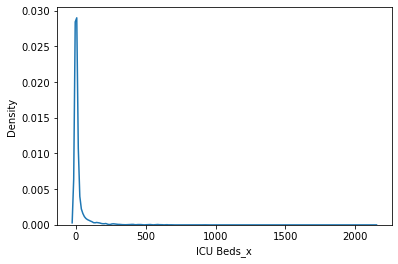

In [13]:
kde_plot(df, 'ICU Beds_x')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


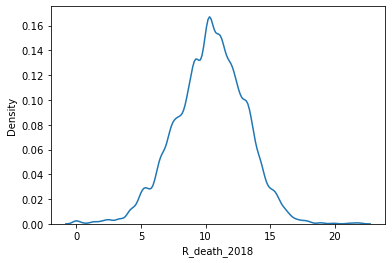

In [14]:
kde_plot(df, 'R_death_2018')

c:\Users\danie\anaconda3\envs\covid-outcomes-research\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


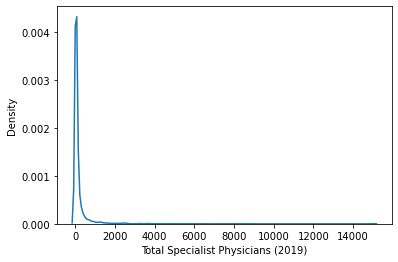

In [15]:
kde_plot(df, 'Total Specialist Physicians (2019)')

**Obtain the feature matrix**

In [8]:
#first, we will create a dataframe with the names for each fips code, then drop our county_names columns from main df, 
# and we will set our fips code as index

names_df = df[['fips', 'COUNTY_NAME']]

df.drop(['Unnamed: 0','Unnamed: 0.1', 'COUNTY_NAME', 'STAB'], axis=1, inplace=True)

In [9]:
outcomes = df[['ICU Beds_x','Total Specialist Physicians (2019)','Active Physicians per 100000 Population 2018 (AAMC)']]

In [10]:
df.drop(["ICU Beds_x","Total Specialist Physicians (2019)","Active Physicians per 100000 Population 2018 (AAMC)"], axis = 1, inplace = True)

# Milestone II: Modeling

In [15]:
import pandas as pd
from numpy import arange

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold



In [24]:
#define predictor and response variables
X = df
y1 = outcomes['ICU Beds_x']
y2=  outcomes['Total Specialist Physicians (2019)']
y3 = outcomes['Active Physicians per 100000 Population 2018 (AAMC)']

**Method for first outcome: ICU Beds_x**

In [25]:
#define train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=42)

In [26]:
#Using a pipeline to dynamically standardize the data that goes into our model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


pipeline = make_pipeline(StandardScaler(), Lasso())
pipeline.fit(X_train, y_train)
print(pipeline[1].coef_, pipeline[1].intercept_)


ValueError: could not convert string to float: 'Georgia'

In [9]:
model.score(X, y1)

0.885725572671928

In [10]:
model.coef_

array([-5.14666552e-04,  6.25284863e-04,  1.11475026e-03, -1.58974077e-04,
       -9.46138767e-07,  5.32206805e-04, -3.45792607e-04, -8.36443498e-05,
       -1.88682893e-03,  4.87532799e-03,  2.20358077e-04,  4.73594650e-04,
        9.64359037e-04, -6.83833008e-03,  7.78248403e-03, -1.96275617e-04,
        6.56454392e-03, -7.86933621e-01])

**Finding the optimal value for $\alpha$**

In [19]:
lasso_cv_pipeline = make_pipeline(StandardScaler(),
                                  LassoCV(alphas=[0.1, 1.0, 10], max_iter=100000))
lasso_cv_pipeline.fit(X_train, y_train)
print(lasso_cv_pipeline[1].alpha_)
# output: 0.1

ValueError: could not convert string to float: 'Georgia'

**Method for first outcome: Total Specialist Physicians (2019)**

**Method for first outcome: Active Physicians per 100000 Population 2018 (AAMC)**

**Find intersection between selected features of 3 methods**

Source : 

https://www.statology.org/lasso-regression-in-python/

https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/#:~:text=In%20Python%2C%20Lasso%20regression%20can%20be%20performed%20using,therefore%20fewer%20features%20being%20used%20in%20the%20model.

https://machinelearningcompass.com/machine_learning_models/lasso_regression/